In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\MohamedIsmail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df=pd.read_csv("C:/Users/MohamedIsmail/Desktop/AAPL.csv")

In [4]:
df=df[:1002]
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
997,2013-04-18,404.989990,405.790009,389.740002,392.049988,166574800,51.543549
998,2013-04-17,420.269993,420.599987,398.109993,402.800007,236264000,52.956875
999,2013-04-16,421.569996,426.610004,420.570000,426.240009,76442800,56.038576
1000,2013-04-15,427.000000,427.890007,419.550003,419.850010,79380000,55.198470
1001,2013-04-12,434.149990,434.149990,429.090008,429.800011,59653300,56.506616


In [5]:
df['HL_PCT']=(df['High']-df['Low'])/df['Adj Close']*100.0
df['PCT_change']=(df['Adj Close']-df['Open'])/df['Open']*100.0
df['Return'] = df['Adj Close'].pct_change()

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,HL_PCT,PCT_change,Return
0,2017-04-03,143.710007,144.119995,143.050003,143.699997,19967200,143.699997,0.744601,-0.006965,NaN
1,2017-03-31,143.720001,144.270004,143.009995,143.660004,19534100,143.660004,0.877077,-0.041746,-0.000278
2,2017-03-30,144.190002,144.500000,143.500000,143.929993,21179100,143.929993,0.694782,-0.180324,0.001879
3,2017-03-29,143.679993,144.490005,143.190002,144.119995,29120900,144.119995,0.902028,0.306237,0.001320
4,2017-03-28,140.910004,144.039993,140.619995,143.800003,33320700,143.800003,2.378302,2.050954,-0.002220


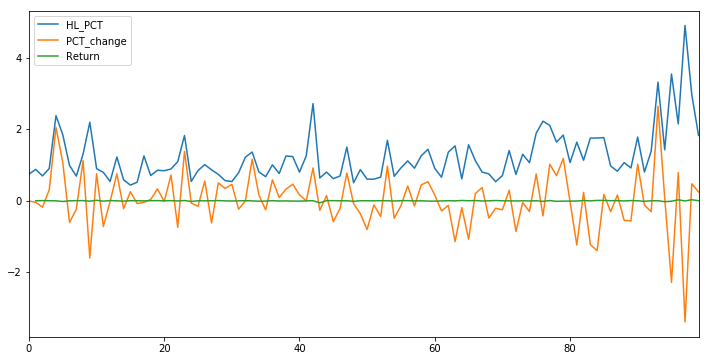

In [7]:
tmp = df[['HL_PCT','PCT_change','Return']]
tmp[:100].plot(figsize=(12,6))
plt.show()

In [8]:
df.dropna(inplace=True)
df['Adj Close'].shift(-1).tail()

997     52.956875
998     56.038576
999     55.198470
1000    56.506616
1001          NaN
Name: Adj Close, dtype: float64

In [37]:
X=df[['HL_PCT','PCT_change','Return']].values
y=df['Adj Close'].values
len(X),len(y)

(1001, 1001)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
len(X), len(X_train), len(X_test)

(1001, 800, 201)

In [39]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y_pred_lr=linearRegression.predict(X_test)

In [41]:
df['LR']=np.nan
df['LR'].iloc[800:]=y_pred_lr
df.tail()

C:\Users\MohamedIsmail\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Date,Open,High,Low,Close,Volume,Adj Close,HL_PCT,PCT_change,Return,LR
997,2013-04-18,404.989990,405.790009,389.740002,392.049988,166574800,51.543549,31.138731,-87.272883,0.003892,109.104995
998,2013-04-17,420.269993,420.599987,398.109993,402.800007,236264000,52.956875,42.468507,-87.399320,0.027420,108.368556
999,2013-04-16,421.569996,426.610004,420.570000,426.240009,76442800,56.038576,10.778297,-86.707172,0.058193,68.548444
1000,2013-04-15,427.000000,427.890007,419.550003,419.850010,79380000,55.198470,15.109122,-87.072958,-0.014992,107.970155
1001,2013-04-12,434.149990,434.149990,429.090008,429.800011,59653300,56.506616,8.954672,-86.984541,0.023699,109.419045


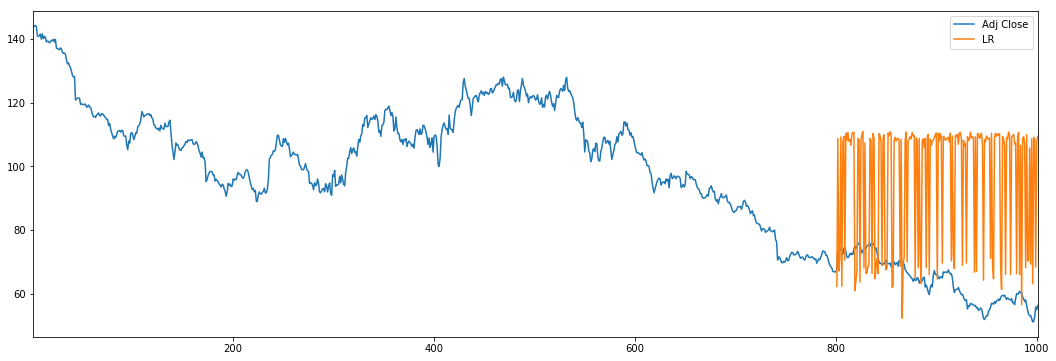

In [42]:
df[['Adj Close','LR']].plot(figsize=(18,6))
plt.show()

In [43]:
LR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_lr))
print('Mean_Squared_Error= :',LR_RMSE)

Mean_Squared_Error= : 11.4235384
